# 2: Python GeoPandas and Geospatial Vector Data

In this second practical session we will begin more hands-on work with geospatial *vector* data (i.e. points, lines, and polygons). We will also introduce the `GeoPandas` package and explore some of its key features for working with this type of data.

Objectives:
* Read/write spatial vector datasets in different formats
* Create/convert/view geometry data
* Produce basic plots of spatial data

Let's get started.

In [1]:
# ! pip install geopandas contextily matplotlib

In [2]:
# load main packages
import geopandas as gpd
import pandas as pd

## Overview and helpful links

Remember that GeoPandas is a developing project that makes dealing with geospatial data in Python much easier. It leverages components from several other projects, including `pandas`, `shapely`, and `fiona`. 

To learn more and to find the documentation to these projects following these links:
* GeoPandas
    * [https://geopandas.org/](https://geopandas.org/)
    * [https://geopandas.readthedocs.io/en/latest/](https://geopandas.readthedocs.io/en/latest/)
* pandas - for DataFrames
    * [https://pandas.pydata.org/](https://pandas.pydata.org/)
* shapely - for geometry
    * [https://shapely.readthedocs.io/en/latest/](https://shapely.readthedocs.io/en/latest/)
* fiona - for file I/O
    * [https://fiona.readthedocs.io/en/latest/](https://fiona.readthedocs.io/en/latest/)

Under the hood, these packages rely on other libraries like GDAL/OGR ([https://www.osgeo.org/projects/gdal/](https://www.osgeo.org/projects/gdal/)) and proj ([https://www.osgeo.org/projects/proj/](https://www.osgeo.org/projects/proj/)).

Refer back to the documentation as you explore the practicals during this workshop. There are many helpful features and we won't be able to cover everything.


### Background on working with tabular data

The practicals will try to give enough guidance and examples of working with different data types, but if you have less experience with `pandas` you may want to refer back to some of the other tutorials for additional help along the way.

* [https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)

## Geospatial vector data

There are different mathematical data models that can be used to represent objects, surfaces, or other geographic phenomena. These specify how data are defined, organised, updated, and queried. The *vector* data model is one example and, as we discussed in the lecture, it is usually contrasted with the *raster* data model.

Vector data represent features whose geometry can consist of:
* Points - a vertex or position in space with X, Y, and optionally Z coordinates

* Lines - sets of vertices linked by paths where the start and ending point are not linked

* Polygons - a closed shape formed by a set of vertices and paths in a set order, where the start and ending point are the same

Don't confuse the data model with a specific file format. There are now several different file formats that can be used to store geospatial vector data (see also: [https://en.wikipedia.org/wiki/GIS_file_formats](https://en.wikipedia.org/wiki/GIS_file_formats)).

The *shapefile* is still a well-known and common file format because it is used by a major GIS software company (ESRI). Other common formats you're likely to encounter are: *geopackages* and *GeoJSON* files. You might notice that the files we're using in the `\data` directory are usually compressed (&ast;.zip). This is mostly for convenience of storing them on Github. Working with your own data you may want to leave them unzipped.

Try unzipping one of the shapefiles (&ast;.shp.zip) on your computer. You will see that it isn't just one file, but a collection of several files. These contain either the geometry, the attributes, a spatial index, coordinate information. And you have to keep them all together and named the same.

If you open one of the geopackages (&ast;.gpkg) and inspect it, you will see that inside is actually a SQLite database (which adhere to certain standards: [https://www.geopackage.org/](https://www.geopackage.org/)). There are many ways to work with vector data files, and we're going to focus on using `GeoPandas` within Python.

Regardless of the file format of the vector data, `fiona` makes it easy to read into GeoPandas using the `geopandas.read_file` command.


In [9]:
# load an example of vector data
# we will use a set of US states from the US Census Bureau
gdf = gpd.read_file('C:\\Users\\HP\\Documents\\GitHub\\GeoSpatial Analyis\\Week 1\\data\\cb_2018_us_state_500k.shp.zip')  # note the use of zip:// + relative path
# paths may need to be changed if you are running the notebook locally

# if we have an uncompressed shapefile instead, point towards the *.shp file: gpd.read_file('\path\to\data.shp')

## Linking place and attributes

The key idea and the real power of geospatial data comes from linking information about a feature to a location in space or in the real-world. This may seem obvious and straight-forward, but it (as we will see) opens up many possibilities for how to integrate many different kinds of data and what questions we can start to ask and answer.

In GeoPandas this central idea of linking attributes to places is operationalised with the core data structure of the `GeoDataFrame`.

The data we just loaded is an example of a `GeoDataFrame`.

In [10]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [11]:
# get the dimensions (rows, cols)
gdf.shape

(56, 10)

In [12]:
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


We saw some of these basic operations in the first practical, but let's look at the results in a bit more detail this time.

* `.head()` shows the first rows of the dataset (from Pandas)
* each row is an observation or a feature to be represented
* the **attributes** of the observations in the `GeoDataFrame` are columns of data (in a `DataFrame`)
* there is the additional **'geometry'** column
* in this example, the geometry is using polygons
    * in fact, there are **multipolygons**. We will discuss these a bit more in a later section, but for now understand that they have multiple parts, each a polygon which describe a single, real-world feature


Because the `gdf` is still (also) a **DataFrame** from pandas, we can work with the attribute columns as we might with a "normal" or non-spatial DataFrame.

In [13]:
# Calculate the total area of land in the US
gdf['ALAND'].sum()

9159859051207

In [14]:
# GeoPandas has another way to quickly get the area of polygon shapes
# examine just the beginning
gdf.area.head()

<ipython-input-14-6cbad770c5b6>:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.area.head()


0    11.885417
1    12.782192
2    18.005001
3    10.685779
4     6.493880
dtype: float64

But what units are those area measurements in? The first seems really big... and the second result seems so different...

We will spend a whole practical looking at how to accurately measure things like area (and perimeter, distance, etc.). Generally, you want to be very careful using something pre-calculated like this because often the process for how the calculations were done isn't clear. 

And, as you can see in the `Warning` message, the coordinate reference system used can have a big impact on the answer. This is telling us that we should "re-project" our data in order to get a more accurate answer. We'll do that later.

### Side track: `pandas` reminders

We can select a subset of attributes and even convert the `GeoDataFrame` back into a pandas `DataFrame` by removing the geometry attribute if we really want to.

In [15]:
gdfSub = gdf.loc[:,['NAME', 'GEOID', 'ALAND']]

In [16]:
# we didn't keep the Geometry column but...
type(gdfSub)  # quirky. it's still a GeoDF

pandas.core.frame.DataFrame

In [17]:
gdfSub.head()

,NAME,GEOID,ALAND
0,Mississippi,28,121533519481
1,North Carolina,37,125923656064
2,Oklahoma,40,177662925723
3,Virginia,51,102257717110
4,West Virginia,54,62266474513


In [18]:
# we can make a `pandas` DataFrame and avoid making a copy of the data
pdSub = pd.DataFrame(gdf[['NAME', 'GEOID', 'ALAND']])

type(pdSub)

pandas.core.frame.DataFrame

In [19]:
pdSub.head()

,NAME,GEOID,ALAND
0,Mississippi,28,121533519481
1,North Carolina,37,125923656064
2,Oklahoma,40,177662925723
3,Virginia,51,102257717110
4,West Virginia,54,62266474513


It's easy to create new columns in a DataFrame. Here we're adding a row index.

In [20]:
pdSub['uid'] = range(1, len(pdSub)+1)

pdSub.head()

,NAME,GEOID,ALAND,uid
0,Mississippi,28,121533519481,1
1,North Carolina,37,125923656064,2
2,Oklahoma,40,177662925723,3
3,Virginia,51,102257717110,4
4,West Virginia,54,62266474513,5


Back to the `GeoDataFrame`...

We can subset rows of the dataframe into a new GeoDataFrame based on conditions.

In [21]:
# Extract just North Carolina into a new GeoDataFrame
nc = gdf[gdf['NAME'] == 'North Carolina']

nc

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."


<AxesSubplot:>

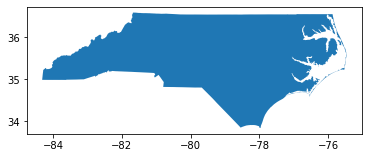

In [22]:
# make a simple map
nc.plot()

The geometry column deserves a bit more attention.

In [23]:
# extract just the geometry attribute
gs = gdf.geometry

In [24]:
# inspect the column (now extracted into its own vector)
type(gs)

geopandas.geoseries.GeoSeries

In [25]:
gs.head()

0    MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...
1    MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...
2    POLYGON ((-103.00257 36.52659, -103.00219 36.6...
3    MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...
4    POLYGON ((-82.64320 38.16909, -82.64300 38.169...
Name: geometry, dtype: geometry

This column is a unique attribute for spatial dataframes. In GeoPandas it is called a `GeoSeries` and it is a set of shapes for each observation in the DataFrame. It is made up of `shapely` objects. Because of this, the `GeoSeries` allows us to use most of the methods and attributes from `shapely`.

We can also access and work with invidual elements of the geometry series within the `GeoDataFrame`, though in practice we may not often do this.

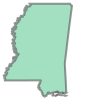

In [26]:
# get the first record and plot its geometry
gdf.loc[0, 'geometry']

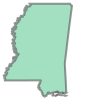

In [27]:
# or as an alternative
gdf.geometry[0]

In a section above we talked about having a **multipolygon** instead of just a polygon. At this *scale* of the map, the state looks like one shape, but it is, in fact, a multi-part polygon. Together these polygon pieces make up the geometric representation for this one object.

In [28]:
# how many "parts" are there in the geometry
len(gdf.geometry[0])

# note, you can also run `print(gdf.geometry[0])` to see the whole, long string

<ipython-input-28-ac382ec89f19>:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(gdf.geometry[0])


8

<ipython-input-29-824b2846ae1c>:3: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  gdf.geometry[0][0]


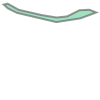

In [29]:
# inspect the first part (of the first state)
# the default behavior is to plot the object
gdf.geometry[0][0]

<ipython-input-34-91bc1c1b846d>:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  gdf.geometry[0][7]


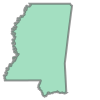

In [34]:
# inspect the last part (of the first state)
gdf.geometry[0][7]

## Creating a GeoDataFrame

If we don't have a ready-made GIS file, there are several ways we can construct a GeoDataFrame within Python.

### Constructing manually

It's possible to construct the GeoDataFrame from a set of attribute data.

In [35]:
# first need to import geometry objects
from shapely.geometry import Point, LineString, Polygon

In [36]:
# create a test dataset manually
test = gpd.GeoDataFrame({
                         'geometry': [Point(1, 1), Point(2,2)],
                         'var1': [1, 2],  # create a column labelled `var1`
                         'var2': [3, 4]
                        })

print(test)
type(test)

                  geometry  var1  var2
0  POINT (1.00000 1.00000)     1     3
1  POINT (2.00000 2.00000)     2     4


geopandas.geodataframe.GeoDataFrame

This step has created a `GeoDataFrame` with two point locations and two other attribute columns.

<AxesSubplot:>

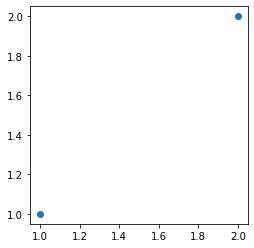

In [37]:
# show the points
test.plot()

Notice that I called the column **'geometry'**, but that can be changed.

In [38]:
# rename the geometry column to 'shape'
test = test.rename(columns={'geometry': 'shape'}).set_geometry('shape')

test

,shape,var1,var2
0,POINT (1.00000 1.00000),1,3
1,POINT (2.00000 2.00000),2,4


In [39]:
# retrieve the attribute for the GeoDataFrame
test.geometry

0    POINT (1.00000 1.00000)
1    POINT (2.00000 2.00000)
Name: shape, dtype: geometry

The `.geometry` attribute will always return the active column (regardless of what it is called), or we can check its actual name.

In [40]:
# return the name of the column that holds the active geometries
test.geometry.name

'shape'

Setting, resetting, renaming a geometry column can come in handy. Your GeoDataFrame could theoretically have two (or more) columns containing spatial information, but you could switch and set your choice with `.set_geometry`. You would still need to take care with correctly managing the objects and coordinate systems.

And it's still a `GeoDataFrame` after all that switching around.

In [41]:
type(test)

geopandas.geodataframe.GeoDataFrame

**Side Track**

The example above shows how it can be quite easy to construct geometries. Let's try a few others.

POLYGON ((0.5 1, 1 2, 0.75 3, 0.75 3.5, 0.5 4, 0.5 1))


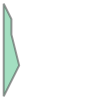

In [42]:
# Create a test poplygon
poly = Polygon([(0.5, 1), (1, 2), (.75, 3), (.75, 3.5), (.5, 4)])

# notice that `Polygon` automatically closes our set of vertices for us
print(poly)
poly

LINESTRING (0.5 1, 1 2, 0.75 3, 0.75 3.5, 0.5 4)


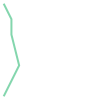

In [43]:
# Create a test line (or "linestring")
# using the same set of coordates as above
ln = LineString([(0.5, 1), (1, 2), (.75, 3), (.75, 3.5), (.5, 4)])

# this time the points aren't closed
print(ln)
ln

What about holes in a polygon?

That's possible, but we'll need to define inner and outer *rings* in such a way that `shapely` understands the relationship between the shapes.

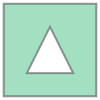

In [44]:
# polygon with a hole
# define the rings
out_ring = [(0, 0), (0, 4), (4, 4), (4, 0), (0, 0)]
in_ring = [(1, 1), (3, 1), (2, 3), (1,1)]

polygon = Polygon(out_ring, [in_ring])  # note `[]`

polygon

#### Try for yourself!

Experiment with making a few of your own geometries for points, lines, and polygons. 

What happens when:
* a `LineString` ends at the same point it started with?
* a `Polygon` intersects itself (repeating a vertex)?

Can you store different geometry types within the same GeoDataFrame?
* Hint: construct something like `test` above, but don't use all `Point` elements.

In [45]:
# Test your code here...


##

### Constructing from a `pandas` DataFrame

More commonly than manually creating data, we will need to create a **Geo**DataFrame from an existing *DataFrame* which might also contain geometry information. In the example below we are going to read in a `.csv` file which contains some coordinate locations and then we'll construct a GeoDataFrame.

This is using an example data of populated places from [https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-populated-places/](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-populated-places/) which I converted into a `.csv` file.

In [48]:
# read .csv file with pandas
df = pd.read_csv('C:\\Users\\HP\\Documents\\GitHub\\GeoSpatial Analyis\\Week 1\\data\\ne_cities_10m.csv')

# creates a non-spatial DataFrame
type(df)

pandas.core.frame.DataFrame

In [49]:
df.shape

(7343, 38)

In [50]:
df.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,ne_id
0,10,1,8,Admin-1 capital,Colonia del Sacramento,NaN,NaN,0,Colonia del Sacramento,0.0,...,0,7,7,3443013.0,NaN,NaN,0,0,9.0,1159112629
1,10,1,8,Admin-1 capital,Trinidad,NaN,NaN,0,Trinidad,0.0,...,0,7,7,3439749.0,NaN,NaN,0,0,9.0,1159112647
2,10,1,8,Admin-1 capital,Fray Bentos,NaN,NaN,0,Fray Bentos,0.0,...,0,7,7,3442568.0,NaN,NaN,0,0,9.0,1159112663
3,10,1,8,Admin-1 capital,Canelones,NaN,NaN,0,Canelones,0.0,...,0,6,6,3443413.0,NaN,NaN,0,0,9.0,1159112679
4,10,1,8,Admin-1 capital,Florida,NaN,NaN,0,Florida,0.0,...,0,7,7,3442585.0,NaN,NaN,0,0,7.0,1159112703


There are a lot of columns in this dataset. More than `pandas` shows by default. But I will tell you that there are two columns: `latitude` and `longitude` that you can use to create `Point` objects and convert the data into a GeoDataFrame.

In [51]:
# we can do the conversion in one step
# pass the data frame along with a shapely object created from the coordinates
cities = gpd.GeoDataFrame(df,
                          geometry = gpd.points_from_xy(df.longitude, df.latitude))

The result should be a new table:

In [52]:
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,ne_id,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,NaN,NaN,0,Colonia del Sacramento,0.0,...,7,7,3443013.0,NaN,NaN,0,0,9.0,1159112629,POINT (-57.84000 -34.48000)
1,10,1,8,Admin-1 capital,Trinidad,NaN,NaN,0,Trinidad,0.0,...,7,7,3439749.0,NaN,NaN,0,0,9.0,1159112647,POINT (-56.90100 -33.54400)
2,10,1,8,Admin-1 capital,Fray Bentos,NaN,NaN,0,Fray Bentos,0.0,...,7,7,3442568.0,NaN,NaN,0,0,9.0,1159112663,POINT (-58.30400 -33.13900)
3,10,1,8,Admin-1 capital,Canelones,NaN,NaN,0,Canelones,0.0,...,6,6,3443413.0,NaN,NaN,0,0,9.0,1159112679,POINT (-56.28400 -34.53800)
4,10,1,8,Admin-1 capital,Florida,NaN,NaN,0,Florida,0.0,...,7,7,3442585.0,NaN,NaN,0,0,7.0,1159112703,POINT (-56.21500 -34.09900)


Notice that the number of columns has changed from the original DataFrame. There is one more column called `geometry` which we created.

In [53]:
cities.shape

(7343, 39)

The `geopandas.points_from_xy` is a convenient function to create a list of `shapely` Points. In fact, it is a wrapper for `[Point(x, y) for x, y in zip(df.longitude, df.latitude)]`.

Pause for a moment. It's easy to get confused by what we mean by 'X' or 'Y' vs. 'Latitude' and 'Longitude'. Remember that lines of *Latitude* measure distance north and south of the equator... so they are 'Y' values. Line of *Longitude* measure distances east and west along the meridians... so they are 'X' values. Yes, technically they're degrees and angles, but we commonly refer to them as X and Y.

In [54]:
# another way to create a list of `shapely` points
[Point(x, y) for x, y in zip(df.longitude, df.latitude)][0:9]

## Saving or exporting data

Once we've finished creating or manipulating a GeoDataFrame in our notebooks, we may want to save that as a new output file. Below we will look at some common output formats. These are useful for sharing data with other researchers who may be using a GIS software or maybe something like `R`.

Note: you may need to adjust the file paths depending on how you are running this notebook.

In [55]:
# # save the cities as a shapefile
# cities.to_file("./world_cities.shp")

In [56]:
# # save the cities as a GeoPackage
# # a GPKG has a "dataset" and a "layer" name
# cities.to_file("./world_cities.gpkg", # path to file
#                 layer='cities', 
#                 driver="GPKG")

To write to other formats, check the installed drivers for `fiona`:

In [57]:
import fiona; fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

Finished!